<a href="https://colab.research.google.com/github/PacoElizondo/ComputerVisionUPT/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 4


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


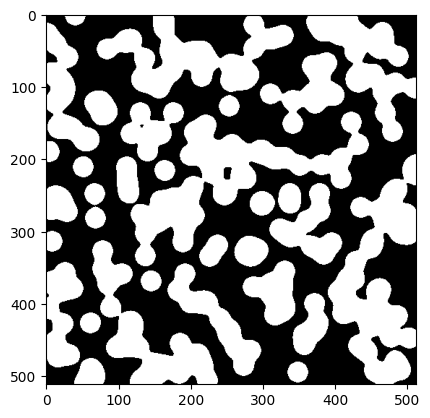

In [78]:
import skimage as sk
import matplotlib.pyplot as plt


blob = sk.data.binary_blobs(blob_size_fraction=0.06)
# disk = sk.morphology.disk(3)
# for i in range(0,2):
#   erosioned_blob = sk.morphology.erosion(blob, disk)
#   blob = erosioned_blob

fig = plt.figure()
plt.imshow(blob, cmap='gray')

/usr/local/lib/python3.11/dist-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


number of regions is 32


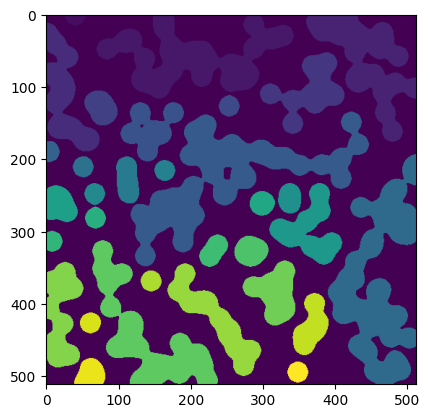

In [79]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(blob)

segmented_blob = blob > thresh

fig = plt.figure()
plt.imshow(segmented_blob, cmap='gray')

label_image, n_regions = sk.measure.label(segmented_blob,return_num=True)
# Labels pixels in groups (regions); if a pixel is neighbour to a previously labeled pixel,
# it gets the same label. If two regions merge when scanning the image, their labels become the same.

plt.imshow(label_image)
print('number of regions is {}'.format(n_regions))

In [80]:
import pandas as pd

props = sk.measure.regionprops_table(label_image,
                                     properties=[ 'label',
                                                  'area',
                                                  'eccentricity',
                                                  'extent',
                                                  'axis_major_length'])
df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity,extent,axis_major_length
0,1,364.0,0.819844,0.784483,29.200331
1,2,14170.0,0.921659,0.443630,275.064242
2,3,10735.0,0.885389,0.399011,206.093810
3,4,6111.0,0.958047,0.463939,198.259198
4,5,5633.0,0.758951,0.426065,127.325411


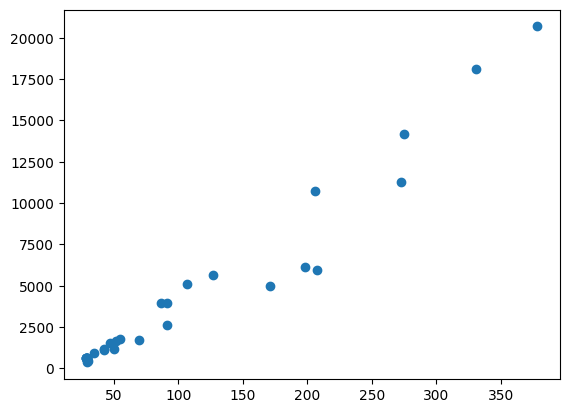

In [81]:
fig = plt.figure()
plt.scatter(x = df_features.axis_major_length, y = df_features.area )

In [90]:
average_size = df_features.area.mean()
big_blobs = df_features.loc[df_features.area>=average_size]
big_blobs

,label,area,eccentricity,extent,axis_major_length
1,2,14170.0,0.921659,0.443630,275.064242
2,3,10735.0,0.885389,0.399011,206.093810
3,4,6111.0,0.958047,0.463939,198.259198
4,5,5633.0,0.758951,0.426065,127.325411
8,9,20680.0,0.925500,0.292835,377.852705
10,11,18079.0,0.938453,0.466002,330.899911
16,17,5136.0,0.473621,0.450013,107.049969
23,24,11280.0,0.925022,0.325767,272.335904
25,26,5016.0,0.958526,0.660695,171.276155
26,27,5980.0,0.973319,0.294872,207.233489


In [91]:
print('number of blobs larger or equal to the average: ' + str(big_blobs.shape[0]))

number of blobs bigger than the average: 10


In [94]:

print('number of blobs smaller than the average: ' + str(n_regions - big_blobs.shape[0]))

number of blobs smaller than the average: 22


In [98]:
import numpy as np
n_big_blobs = np.array((df_features.area>=average_size))
big_indices = np.where(n_big_blobs)[0]
n_smol_blobs = np.array((df_features.area<average_size))
smol_indices = np.where(n_smol_blobs)[0]

print('big blobs indices: ', big_indices)
print('small blobs indices', smol_indices)

big blobs indices:  [ 1  2  3  4  8 10 16 23 25 26]
small blobs indices [ 0  5  6  7  9 11 12 13 14 15 17 18 19 20 21 22 24 27 28 29 30 31]


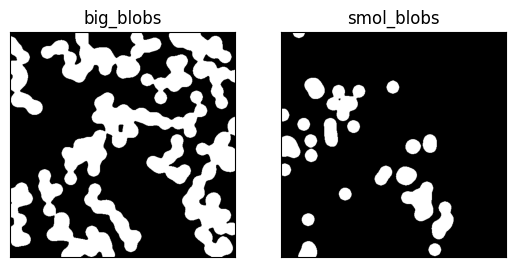

In [100]:
valid_big_blobs= df_features['label'][n_big_blobs].to_numpy()
valid_smol_blobs= df_features['label'][n_smol_blobs].to_numpy()
big_mask = (label_image == valid_big_blobs[0])
smol_mask = (label_image == valid_smol_blobs[0])

for i in valid_big_blobs:
  big_mask |= (label_image == i)

for i in valid_smol_blobs:
  smol_mask |= (label_image == i)

true_big_blobs = label_image * big_mask
true_smol_blobs = label_image * smol_mask

sharp_thresh = 0.01
sharp_big_blobs = true_big_blobs > thresh
sharp_smol_blobs = true_smol_blobs > thresh

fig = plt.figure()
plt.subplot(1, 2, 1), plt.xticks([]), plt.yticks([])
plt.imshow(sharp_big_blobs, cmap='gray')
plt.title('big_blobs')
plt.subplot(1, 2, 2), plt.xticks([]), plt.yticks([])
plt.imshow(sharp_smol_blobs, cmap='gray')
plt.title('smol_blobs')
plt.show()



In [101]:

from skimage.feature.texture import graycomatrix, graycoprops

image = np.array([[0, 0, 1, 1],[0, 0, 1, 1],[0, 2, 2, 2],[2, 2, 3, 3]], dtype=np.uint8)
g = graycomatrix(blob, [1], [0], levels=4, normed=False, symmetric=False)
print(image)
print('Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,0,0,0]))
print('Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,1,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,2,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,0,0,0]))


[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 127569
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 3131
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 0
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0


In [104]:
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte

props = regionprops(label_image, intensity_image=blob)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = blob[minr:maxr, minc:maxc]

    # Convertir a uint8 y escalar valores si es necesario
    Iu8 = img_as_ubyte(I)

    # Calcular GLCM
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extraer características
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,3483.482143,13.660714,0.946429,0.795996,0.830303
1,1387.379808,5.440705,0.978664,0.693172,0.957211
2,1505.985520,5.905826,0.976840,0.695812,0.953043
3,1796.519547,7.045175,0.972372,0.690548,0.944329
4,1483.252594,5.816677,0.977190,0.697258,0.953594
5,2378.229167,9.326389,0.963426,0.772994,0.900409
6,3870.535714,15.178571,0.940477,0.768164,0.831826
7,2278.700589,8.936081,0.964957,0.692722,0.927942
8,1745.550805,6.845297,0.973156,0.689756,0.946108
9,3238.793103,12.701149,0.950192,0.826210,0.815558
